<a href="https://colab.research.google.com/github/djrl10/SKRIPSI/blob/main/LSTM_SDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Software Defect Prediction - LSTM

In [1]:
rom google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Import Library

In [2]:
!pip3 install javalang
import tensorflow as tf
import pandas as pd
import numpy as np
import javalang
import javalang.tree as jlt
from os import walk
from io import StringIO
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from keras.models import Sequential
from keras.layers import Dense
!pip install unidecode
from unidecode import unidecode
import nltk
nltk.download('punkt')
from nltk import sent_tokenize, word_tokenize
from string import punctuation
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

     |████████████████████████████████| 245kB 7.7MB/s 
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


##Abstract Syntax Tree

1)Method invocation and class instance creation nodes:
Extract and record these nodes using their method or class names. For example, we extract method pop() and push() in File2.java and record them as pop and push.

2)Declaration nodes: Extract method declaration, type
declaration and enum declaration nodes, and record them
using their names.

3)Control-flow nodes: Extract those statements or
clauses related to control flow of a program, e.g., if state- ment, for statement, while statement, catch clause. Control-flow nodes are recorded using their statement types, e.g., if statement is recorded as if, and catch clause is recorded as catch.
Therefore

karena hanya 3 aturan yg digunakan maka types node dari AST yg digunakan adalah dibawah ini:

In [3]:
types = [jlt.FormalParameter, jlt.BasicType, jlt.PackageDeclaration, jlt.InterfaceDeclaration, jlt.CatchClauseParameter,
         jlt.ClassDeclaration, jlt.MethodInvocation, jlt.SuperMethodInvocation, jlt.MemberReference, jlt.SuperMemberReference,
         jlt.ConstructorDeclaration, jlt.ReferenceType, jlt.MethodDeclaration, jlt.VariableDeclarator, jlt.IfStatement,
         jlt.WhileStatement, jlt.DoStatement, jlt.ForStatement, jlt.AssertStatement, jlt.BreakStatement,
         jlt.ContinueStatement, jlt.ReturnStatement, jlt.ThrowStatement, jlt.SynchronizedStatement, jlt.TryStatement,
         jlt.SwitchStatement, jlt.BlockStatement, jlt.StatementExpression, jlt.TryResource, jlt.CatchClause,
         jlt.CatchClauseParameter, jlt.SwitchStatementCase, jlt.ForControl, jlt.EnhancedForControl]

Function untuk parse dari source code ke AST -> Token

Didefinisikan secara manual

In [4]:
def parse(source):
    tokens = javalang.parse.parse(source)
    result = []
    for path, node in tokens:
        if isinstance(node, jlt.PackageDeclaration):
            result.append(node.name)
            continue
        if isinstance(node, jlt.IfStatement):
            result.append("if")
            continue
        if isinstance(node, jlt.InterfaceDeclaration):
            result.append(node.name)
            continue
        if isinstance(node, jlt.ClassDeclaration):
            result.append(node.name)
            continue
        if isinstance(node, jlt.MethodInvocation):
            result.append(node.member)
            continue
        if isinstance(node, jlt.MemberReference):
            result.append(node.member)
            continue
        if isinstance(node, jlt.ConstructorDeclaration):
            result.append(node.name)
            continue
        if isinstance(node, jlt.ReferenceType):
            result.append(node.name)
            continue
        if isinstance(node, jlt.MethodDeclaration):
            result.append(node.name)
            continue
        if isinstance(node, jlt.VariableDeclarator):
            result.append(node.name)
            continue
        if isinstance(node, jlt.ThrowStatement):
            result.append("throw")
            continue
        if isinstance(node, jlt.TryStatement):
            result.append("try")
            continue
        if isinstance(node, jlt.BlockStatement):
            result.append("block")
            continue
        if isinstance(node, jlt.CatchClause):
            result.append("catch")
            continue
        if isinstance(node, jlt.ForStatement):
            result.append("for")
            continue
        if isinstance(node, jlt.AssertStatement):
            result.append("assert")
            continue
        if isinstance(node, jlt.BreakStatement):
            result.append("break")
            continue
        if isinstance(node, jlt.ContinueStatement):
            result.append("cotinue")
            continue
        if isinstance(node, jlt.ReturnStatement):
            result.append("return")
            continue
        if isinstance(node, jlt.ReturnStatement):
            result.append("return")
            continue
        if isinstance(node, jlt.ThrowStatement):
            result.append("throw")
            continue
        if isinstance(node, jlt.SwitchStatement):
            result.append("switch")
            continue
        if isinstance(node, jlt.WhileStatement):
            result.append("while")
            continue
        if isinstance(node, jlt.DoStatement):
            result.append("do")
            continue
        if isinstance(node, jlt.CatchClauseParameter):
            result.append(node.types)
            continue
        if isinstance(node, jlt.BasicType):
            result.append(node.name)
            continue
        if isinstance(node, jlt.SynchronizedStatement):
            result.append("Synchronized")
            continue
    return result

Proses mengubah Source Code (File) -> AST -> Token

Arsitektur Folder


"Nama Project"

    "Defect"

        "File Defect 1"

        "File Defect 2"

        ....

    "Non-Defect"

        "File Non-Defect 1"

        "File Non-Defect 2"

        ....

In [5]:
def Tokenize(dir_name):
    df_list = []
    df = pd.DataFrame(columns=['File','Token','Defect'])
    for (dirpath, dirnames, filenames) in walk(dir_name):
        for label in dirnames: 
            for (dirpath, dirnames, filenames) in walk(dir_name+'/'+label):
                for filename in filenames:
                    f = open(dir_name+'/'+label+'/'+filename, "r")
                    f = f.read()
                    try:
                        p = parse(f)
                    except:
                        continue

                    temp = pd.DataFrame([[filename,p,label]],columns=['File','Token','Defect'])
                    df_list.append(temp)
                break
        break
    df = pd.concat(df_list)
    df = df.reset_index()
    return df

In [6]:
list_label = ['Tokencamel-1_6', 'Tokencamel-1_4']
list_path = ['/content/drive/My Drive/data_set/camel-1.6', '/content/drive/My Drive/data_set/camel-1.4']
datasets = dict()


In [7]:
for index in range(2) :
  data = Tokenize(list_path[index])
  datasets.update({list_label[index] : data})

In [8]:
data.head()

,index,File,Token,Defect
0,0,RedeliveryPolicy.java,"[org.apache.camel.processor, RedeliveryPolicy,...",Defect
1,0,BuilderSupport.java,"[org.apache.camel.builder, BuilderSupport, Cam...",Defect
2,0,Splitter.java,"[org.apache.camel.processor, Splitter, String,...",Defect
3,0,ThreadType.java,"[org.apache.camel.model, ThreadType, FIELD, In...",Defect
4,0,ValidatingProcessor.java,"[org.apache.camel.processor.validation, Valida...",Defect


In [9]:
features = dict()
labels = dict()

In [10]:
for key in datasets.keys() :
  list_token = datasets[key].iloc[:, 2:-1]
  label = datasets[key].iloc[:, -1:].values
  features.update({key : list_token})
  labels.update({key : label})
  

In [11]:
list_token.head()

,Token
0,"[org.apache.camel.processor, RedeliveryPolicy,..."
1,"[org.apache.camel.builder, BuilderSupport, Cam..."
2,"[org.apache.camel.processor, Splitter, String,..."
3,"[org.apache.camel.model, ThreadType, FIELD, In..."
4,"[org.apache.camel.processor.validation, Valida..."


In [12]:
clean_features = dict()

In [13]:
for key in datasets.keys() :
  feature = features[key].values
  clean_feature = list()
  for idx, val in enumerate(feature) :
    filtered_feature = [x for x in val[0] if isinstance(x, str)]
    clean_feature.append(filtered_feature)
  clean_features.update({key : clean_feature})

In [14]:
join_features = dict()
join_label = dict()

In [15]:
for key in datasets.keys() :
  lb = pd.DataFrame(labels[key], columns=['labels'])
  lb_dum = pd.get_dummies(lb.labels)
  lb_dum.head()
  label = lb_dum[['Defect', 'Non-Defect']].values
  join_label.update({key : label})
  new_feature = [', '.join(item) for item in clean_features[key]]
  join_features.update({key : new_feature})

##Word Embedding

In [16]:
cv = CountVectorizer()
join = TfidfTransformer()

In [17]:
join_features[key]

['org.apache.camel.processor, RedeliveryPolicy, Random, randomNumberGenerator, Log, LOG, getLog, RedeliveryPolicy, int, maximumRedeliveries, long, initialRedeliveryDelay, long, maximumRedeliveryDelay, double, backOffMultiplier, boolean, useExponentialBackOff, double, collisionAvoidanceFactor, boolean, useCollisionAvoidance, RedeliveryPolicy, toString, String, return, maximumRedeliveries, copy, RedeliveryPolicy, try, return, RedeliveryPolicy, clone, catch, throw, RuntimeException, e, e, shouldRedeliver, boolean, int, if, getMaximumRedeliveries, block, return, return, redeliveryCounter, getMaximumRedeliveries, sleep, long, long, redeliveryDelay, getRedeliveryDelay, redeliveryDelay, if, redeliveryDelay, block, if, isDebugEnabled, block, debug, redeliveryDelay, try, sleep, redeliveryDelay, catch, if, isDebugEnabled, block, debug, e, e, return, redeliveryDelay, getRedeliveryDelay, long, long, long, redeliveryDelay, if, previousDelay, block, redeliveryDelay, initialRedeliveryDelay, if, useEx

In [18]:
join_label[key]

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], dtype=uint8)

###Split data into training and validation

In [19]:
token_trains = dict()
token_tests = dict()
label_trains = dict()
label_tests = dict()
for key in datasets.keys():
  tkn_train, tkn_test, lbl_train, lbl_test = train_test_split(join_features[key], join_label[key], test_size=0.2, shuffle=True)
  token_trains.update({key:tkn_train})
  token_tests.update({key:tkn_test})
  label_trains.update({key:lbl_train})
  label_tests.update({key:lbl_test})

In [20]:
print(len(token_trains['Tokencamel-1_4']))
print(len(token_tests['Tokencamel-1_4']))
print(len(label_trains['Tokencamel-1_4']))
print(len(label_tests['Tokencamel-1_4']))
print("===")
print(len(token_trains['Tokencamel-1_6']))
print(len(token_tests['Tokencamel-1_6']))
print(len(label_trains['Tokencamel-1_6']))
print(len(label_tests['Tokencamel-1_6']))

668
167
668
167
===
726
182
726
182


In [21]:
# tokenizer
padded_trains = dict()
padded_tests = dict()

for key in datasets.keys():
  tokenizer = Tokenizer(num_words=5000, oov_token='x', filters='!"#$%&()*+,-./:;<=>@[\]^_`{|}~ ')
  tokenizer.fit_on_texts(token_trains[key]) 
  tokenizer.fit_on_texts(token_tests[key])
 
  sekuens_train = tokenizer.texts_to_sequences(token_trains[key])
  sekuens_test = tokenizer.texts_to_sequences(token_tests[key])
 
  padded_train = pad_sequences(sekuens_train) 
  padded_test = pad_sequences(sekuens_test)

  padded_tests.update({key : padded_test})
  padded_trains.update({key : padded_train})
  
  print(padded_test.shape)
  print(padded_train.shape)

(182, 863)
(726, 1933)
(167, 821)
(668, 1639)


##Model LSTM

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=64),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy',)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 435,586
Trainable params: 435,586
Non-trainable params: 0
_________________________________________________________________


In [23]:
# model fit
results = dict()
for key in datasets.keys():
  hasil = model.fit(padded_trains[key], label_trains[key], epochs=10, 
                    steps_per_epoch = 14, validation_data=(padded_tests[key], label_tests[key]), verbose=2, 
                    validation_steps=14)
  print(hasil.history['accuracy'])
  results.update({key:hasil})

Epoch 1/10
14/14 - 52s - loss: 0.6088 - accuracy: 0.7879 - val_loss: 0.5103 - val_accuracy: 0.7912
Epoch 2/10
14/14 - 48s - loss: 0.4953 - accuracy: 0.7975 - val_loss: 0.4971 - val_accuracy: 0.7912
Epoch 3/10
14/14 - 48s - loss: 0.4185 - accuracy: 0.8058 - val_loss: 0.4776 - val_accuracy: 0.7967
Epoch 4/10
14/14 - 50s - loss: 0.2922 - accuracy: 0.8898 - val_loss: 0.4920 - val_accuracy: 0.7912
Epoch 5/10
14/14 - 49s - loss: 0.1823 - accuracy: 0.9394 - val_loss: 0.4945 - val_accuracy: 0.8132
Epoch 6/10
14/14 - 49s - loss: 0.1130 - accuracy: 0.9601 - val_loss: 0.6941 - val_accuracy: 0.8022
Epoch 7/10
14/14 - 48s - loss: 0.0583 - accuracy: 0.9821 - val_loss: 0.7194 - val_accuracy: 0.8022
Epoch 8/10
14/14 - 48s - loss: 0.0476 - accuracy: 0.9848 - val_loss: 0.8299 - val_accuracy: 0.7692
Epoch 9/10
14/14 - 49s - loss: 0.0491 - accuracy: 0.9835 - val_loss: 0.7833 - val_accuracy: 0.7802
Epoch 10/10
14/14 - 50s - loss: 0.0407 - accuracy: 0.9890 - val_loss: 0.8495 - val_accuracy: 0.7857
[0.787878

[0.7878788113594055, 0.797520637512207, 0.8057851195335388, 0.8898071646690369, 0.939393937587738, 0.9600551128387451, 0.9820936918258667, 0.9848484992980957, 0.9834710955619812, 0.9889807105064392]


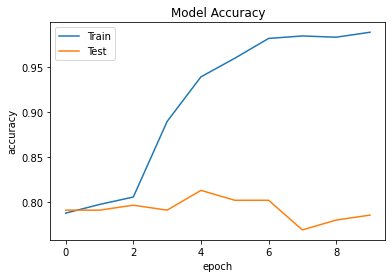

[0.7529940009117126, 0.82485032081604, 0.8443113565444946, 0.8892215490341187, 0.9491018056869507, 0.9745509028434753, 0.9805389046669006, 0.9805389046669006, 0.9865269660949707, 0.9865269660949707]


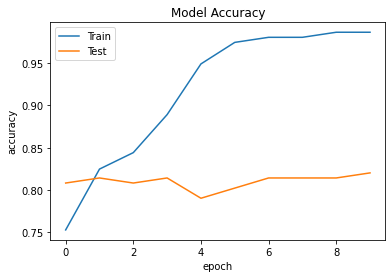

In [24]:
for key in datasets.keys():  
  print(results[key].history['accuracy'])
  plt.plot(results[key].history['accuracy'])
  plt.plot(results[key].history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

[0.6087660193443298, 0.4953366816043854, 0.4185255765914917, 0.29215767979621887, 0.18233166635036469, 0.11297038942575455, 0.058282509446144104, 0.04761725664138794, 0.04907367005944252, 0.04067390039563179]


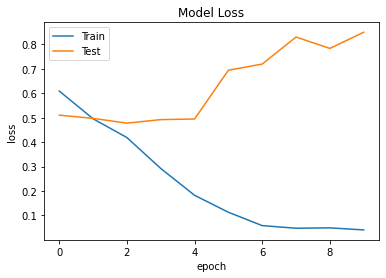

[0.660115659236908, 0.4009794592857361, 0.3198535144329071, 0.24542930722236633, 0.16918769478797913, 0.1015857458114624, 0.07173369079828262, 0.05803826078772545, 0.03987110033631325, 0.043407123535871506]


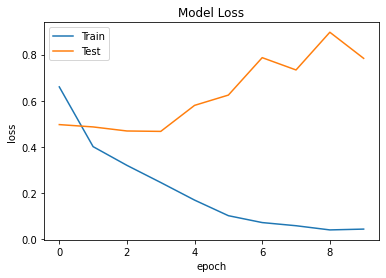

In [25]:
# plot of loss
for key in datasets.keys(): 
  print(results[key].history['loss'])
  plt.plot(results[key].history['loss'])
  plt.plot(results[key].history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

In [26]:
rounded_labels=np.argmax(label_tests['Tokencamel-1_4'], axis=1)
rounded_predictions = model.predict_classes(padded_tests['Tokencamel-1_4'], batch_size=10, verbose=0)
cm = confusion_matrix(rounded_labels, rounded_predictions)
cm

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[ 11,  20],
       [ 10, 126]])

In [27]:
print(precision_score(rounded_labels, rounded_predictions))
print(recall_score(rounded_labels, rounded_predictions))
print(f1_score(rounded_labels, rounded_predictions))

0.863013698630137
0.9264705882352942
0.8936170212765958


In [28]:
rounded_labels1=np.argmax(label_tests['Tokencamel-1_6'], axis=1)
rounded_predictions1 = model.predict_classes(padded_tests['Tokencamel-1_6'], batch_size=10, verbose=0)
cm = confusion_matrix(rounded_labels1, rounded_predictions1)
cm

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[ 12,  26],
       [ 15, 129]])

In [29]:
print(precision_score(rounded_labels1, rounded_predictions1))
print(recall_score(rounded_labels1, rounded_predictions1))
print(f1_score(rounded_labels1, rounded_predictions1))

0.832258064516129
0.8958333333333334
0.8628762541806021


##Model RNN

In [30]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=64),
    tf.keras.layers.SimpleRNN(128),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model2.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy',)
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 128)               24704     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 258       
Total params: 361,474
Trainable params: 361,474
Non-trainable params: 0
_________________________________________________________________


In [31]:
# model fit
results = dict()
for key in datasets.keys():
  hasil = model2.fit(padded_trains[key], label_trains[key], epochs=10, 
                    steps_per_epoch =14, validation_data=(padded_tests[key], label_tests[key]), verbose=2, 
                    validation_steps=14)
  print(hasil.history['accuracy'])
  results.update({key:hasil})

Epoch 1/10
14/14 - 15s - loss: 0.5679 - accuracy: 0.7672 - val_loss: 0.5304 - val_accuracy: 0.7912
Epoch 2/10
14/14 - 14s - loss: 0.5262 - accuracy: 0.7975 - val_loss: 0.5111 - val_accuracy: 0.7912
Epoch 3/10
14/14 - 14s - loss: 0.5077 - accuracy: 0.7975 - val_loss: 0.5101 - val_accuracy: 0.7912
Epoch 4/10
14/14 - 14s - loss: 0.5031 - accuracy: 0.7975 - val_loss: 0.5040 - val_accuracy: 0.7912
Epoch 5/10
14/14 - 14s - loss: 0.4645 - accuracy: 0.8085 - val_loss: 0.5501 - val_accuracy: 0.7802
Epoch 6/10
14/14 - 14s - loss: 0.4439 - accuracy: 0.8003 - val_loss: 0.5133 - val_accuracy: 0.7912
Epoch 7/10
14/14 - 14s - loss: 0.4246 - accuracy: 0.8154 - val_loss: 0.4774 - val_accuracy: 0.7912
Epoch 8/10
14/14 - 14s - loss: 0.3757 - accuracy: 0.8127 - val_loss: 0.4582 - val_accuracy: 0.7857
Epoch 9/10
14/14 - 14s - loss: 0.2805 - accuracy: 0.8815 - val_loss: 0.4530 - val_accuracy: 0.7912
Epoch 10/10
14/14 - 14s - loss: 0.2041 - accuracy: 0.9242 - val_loss: 0.6089 - val_accuracy: 0.8022
[0.767217

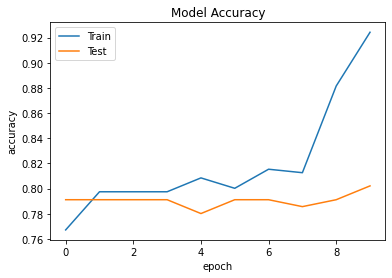

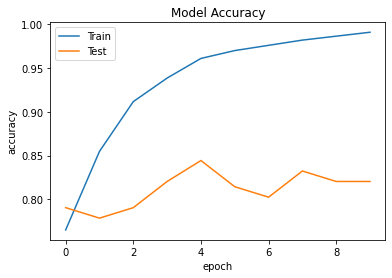

In [32]:
for key in datasets.keys():  
  plt.plot(results[key].history['accuracy'])
  plt.plot(results[key].history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

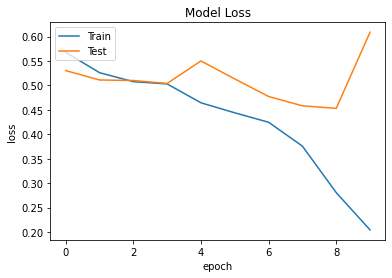

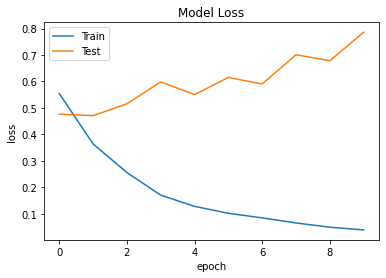

In [33]:
# plot of loss
for key in datasets.keys(): 
  plt.plot(results[key].history['loss'])
  plt.plot(results[key].history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

In [34]:
rounded_labels2=np.argmax(label_tests['Tokencamel-1_4'], axis=1)
rounded_predictions2 = model2.predict_classes(padded_tests['Tokencamel-1_4'], batch_size=10, verbose=0)
cm = confusion_matrix(rounded_labels2, rounded_predictions2)
cm

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[ 13,  18],
       [ 12, 124]])

In [35]:
print(precision_score(rounded_labels2, rounded_predictions2))
print(recall_score(rounded_labels2, rounded_predictions2))
print(f1_score(rounded_labels2, rounded_predictions2))

0.8732394366197183
0.9117647058823529
0.8920863309352517


In [36]:
rounded_labels3=np.argmax(label_tests['Tokencamel-1_6'], axis=1)
rounded_predictions3 = model2.predict_classes(padded_tests['Tokencamel-1_6'], batch_size=10, verbose=0)
cm = confusion_matrix(rounded_labels3, rounded_predictions3)
cm

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[ 13,  25],
       [ 16, 128]])

In [37]:
print(precision_score(rounded_labels3, rounded_predictions3))
print(recall_score(rounded_labels3, rounded_predictions3))
print(f1_score(rounded_labels3, rounded_predictions3))

0.8366013071895425
0.8888888888888888
0.8619528619528619
